# 3 Fases y Circuito Equivalente 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.fftpack import fft
from scipy.signal import find_peaks
import scipy.optimize 


/home/martin/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


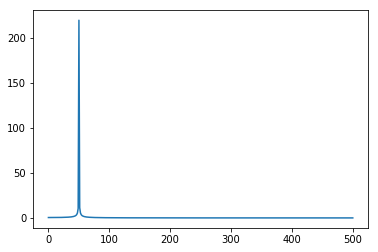

In [2]:

# Number of samplepoints
N = 800
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N)
U1_A = 220*np.sin(50.0 * 2.0*np.pi*x) 

U1_B = 220*np.sin(50.0 * 2.0*np.pi*x +np.pi*2/3) 

U1_C = 220*np.sin(50.0 * 2.0*np.pi*x -np.pi*2/3) 

# IMPORTANTE: NO SIEMPRE SE MANTIENEN LAS AMPLITUDES DE ONDA EN LA TRANSFORMADA, Y SE OBTIENEN VALORES MENORES
# Depende de la precisión y cantidad de sampleo
Uf1_A = fft(U1_A)

Uf1_B = fft(U1_B)

Uf1_C = fft(U1_C)

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(Uf1_C[:N//2]))  # pruebo con Uf1_C a ver si sale lo mismo. OK
plt.show()

In [3]:
RPM_nom = 3200  #DATO CHAPA 
Vel_angular_nom = RPM_nom*2*np.pi/60
s_nom=4/100 #DATO CHAPA   # me armo una función de resbalamiento para el transitorio de arranque, no uso F(k*s), sólo en los cálculos
s_arr=.999

def s(x):
    if x<0.5:
        s=4*(s_nom-s_arr)*x**2 +s_arr 
    else:
        if x>=0.5:
            s=s_nom 
    return s
s(x[0]), s(x[150]),s(x[550])

(0.999, 0.912473819746523, 0.04)

In [4]:
s_motor=[s(x[e]) for e in range(N)]
s_motor[0],s_motor[150],s_motor[550],

(0.999, 0.912473819746523, 0.04)

In [6]:
# armo una impedancia equivalente del motor para probar resto del código, NO TRABAJAR CON ÁNGULO, TRABAJAR CON RADIANES
R1mot=R2mot= 6 # original 6 , prueba con 1                # FUNCION np.degrees() tiene mucho error al pasar rad a deg y los cos y sin no dan bien
X1mot=X2mot= 13j  #original 13 , prueba con 5j
Z1mot=R1mot+X1mot 
# Z2mot=R2mot+X2mot tengo que ponerle el resbalamiento
Z0mot=35+6.5j  #  original = 35+6.5j ,  prueba con  55+6j

Zmotor_test=[Z1mot +Z0mot*(R2mot/s_motor[e]+X2mot)/(Z0mot +R2mot/s_motor[e]+X2mot) for e in range(N)] 
abs(Zmotor_test[550]), np.cos(np.angle(Zmotor_test[550])),Zmotor_test[550]  #550 a ver que sale

(38.72047329509077,
 0.8889513076643963,
 (34.42061536905528+17.734043244883363j))

In [6]:
# si se da el caso de señales con múltiples componentes, hay que usar peaks y dividir donde concuerdan las frecuencias ej 50Hz 

In [7]:
MAX1_A= max(abs(Uf1_A))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_U1_A= find_peaks( 2.0/N*np.abs(Uf1_A),height=MAX1_A/50 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

MAX1_B= max(abs(Uf1_B))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_U1_B= find_peaks( 2.0/N*np.abs(Uf1_B),height=MAX1_B/50 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

MAX1_C= max(abs(Uf1_C))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_U1_C= find_peaks( 2.0/N*np.abs(Uf1_C),height=MAX1_C/50 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

###############################################################################################
# peak_index1 
L1_A=int(len(peak_index_U1_A[0])/2)
peaks_U1_A=np.zeros((L1_A,2))                # array frequencias y picos

L1_B=int(len(peak_index_U1_B[0])/2)
peaks_U1_B=np.zeros((L1_B,2))                # array frequencias y picos

L1_C=int(len(peak_index_U1_C[0])/2)
peaks_U1_C=np.zeros((L1_C,2))                # array frequencias y picos

#################################################################################################
peaks_U1_A[:,0] = xf[peak_index_U1_A[0][0:L1_A]]
peaks_U1_A[:,1]= peak_index_U1_A[1]['peak_heights'][0:L1_A]
# Para poder usar las fft, hay que trabajar con los INDICES donde concuerda la frecuencia en este caso, el 40
peaks_U1_A  , peak_index_U1_A   #  ESTO ES INFORMACION DE SALIDA 

peaks_U1_B[:,0] = xf[peak_index_U1_B[0][0:L1_B]]
peaks_U1_B[:,1]= peak_index_U1_B[1]['peak_heights'][0:L1_B]
# Para poder usar las fft, hay que trabajar con los INDICES donde concuerda la frecuencia en este caso, el 40
peaks_U1_B  , peak_index_U1_B #  ESTO ES INFORMACION DE SALIDA 

peaks_U1_C[:,0] = xf[peak_index_U1_C[0][0:L1_C]]
peaks_U1_C[:,1]= peak_index_U1_C[1]['peak_heights'][0:L1_C]
# Para poder usar las fft, hay que trabajar con los INDICES donde concuerda la frecuencia en este caso, el 40
peaks_U1_A,  peaks_U1_B,  peaks_U1_C   #  ESTO ES INFORMACION DE SALIDA  

(array([[ 50.12531328, 218.95484026]]),
 array([[ 50.12531328, 219.16382716]]),
 array([[ 50.12531328, 219.16382716]]))

In [8]:
# Para poder usar las fft, hay que trabajar con los INDICES donde concuerda la frecuencia en este caso, el 38
peak_index_U1_A  

(array([ 40, 760]), {'peak_heights': array([218.95484026, 218.95484026])})

In [9]:
# armo las corriente de prueba con las partes reales de la tensión y la impedancia
# Tensión y esta corriente es lo que voy a medir   MEDICIONES QUE SON DATOS DE ENTRADA
I1_A=[(220/abs(Zmotor_test[i]))*np.sin( 50.0*2.0*np.pi*x[i] -np.angle(Zmotor_test[i]))  for i in range(N)]
I1_B=[(220/abs(Zmotor_test[i]))*np.sin( 50.0*2.0*np.pi*x[i] -np.angle(Zmotor_test[i]) +np.pi*2/3 )  for i in range(N)]
I1_C=[(220/abs(Zmotor_test[i]))*np.sin( 50.0*2.0*np.pi*x[i] -np.angle(Zmotor_test[i]) -np.pi*2/3 )  for i in range(N)]


In [10]:
I1_C[0]  ,  I1_C[100] ,  I1_C[300] ,  I1_C[500]

(-0.2021304256390049,
 -0.5934576701998326,
 -1.8267490659582977,
 -3.9472911081431343)

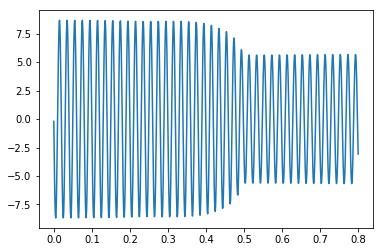

In [13]:
fig, ax = plt.subplots()
ax.plot(x, I1_C)
plt.show()  

In [12]:
If1_A=  fft(I1_A)   
MAX3_A=max(abs(If1_A))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_I1_A=find_peaks( 2.0/N*np.abs(If1_A),height=MAX3_A/1.1 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

# peak_index3                               
L3_A=int(len(peak_index_I1_A[0])/2)
peaks_I1_A=np.zeros((L3_A,2))                # array frequencias y picos.  peaks_I1_A  y  peak_index_I1_A son info de salida

peaks_I1_A[:,0] = xf[peak_index_I1_A[0][0:L3_A]]
peaks_I1_A[:,1]= peak_index_I1_A[1]['peak_heights'][0:L3_A]

peak_index_I1_A, peaks_I1_A # a causa de height=MAX3/1.1 me da un solo pico, pero hay un transitorio muy fuerte=> tira promedio aproximado
##################################################################################################################
If1_B=  fft(I1_B)   
MAX3_B=max(abs(If1_B))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_I1_B=find_peaks( 2.0/N*np.abs(If1_B),height=MAX3_B/1.1 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

# peak_index3                               
L3_B=int(len(peak_index_I1_B[0])/2)
peaks_I1_B=np.zeros((L3_B,2))                # array frequencias y picos.  peaks_I1_B  y  peak_index_I1_B son info de salida

peaks_I1_B[:,0] = xf[peak_index_I1_B[0][0:L3_B]]
peaks_I1_B[:,1]= peak_index_I1_B[1]['peak_heights'][0:L3_B]

peak_index_I1_B, peaks_I1_B # a causa de height=MAX3/1.1 me da un solo pico, pero hay un transitorio muy fuerte=> tira promedio aproximado
############################################################################################################
If1_C=  fft(I1_C)   
MAX3_C=max(abs(If1_C))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_I1_C=find_peaks( 2.0/N*np.abs(If1_C),height=MAX3_C/1.1 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

# peak_index3                               
L3_C=int(len(peak_index_I1_C[0])/2)
peaks_I1_C=np.zeros((L3_C,2))                # array frequencias y picos.  peaks_I1_C  y  peak_index_I1_C son info de salida

peaks_I1_C[:,0] = xf[peak_index_I1_C[0][0:L3_C]]
peaks_I1_C[:,1]= peak_index_I1_C[1]['peak_heights'][0:L3_C]

peaks_I1_A,  peaks_I1_B,  peaks_I1_C # a causa de height=MAX3/1.1 me da un solo pico, pero hay un transitorio muy fuerte=> tira promedio aproximado

(array([[50.12531328,  7.02621467]]),
 array([[50.12531328,  7.04488335]]),
 array([[50.12531328,  7.02431458]]))

In [23]:
# Analizo suma de tensiones y corrientes, tal que las fases esten en equilibrio
U1_SUM = U1_A + U1_B + U1_C
I1_SUM = I1_A + I1_B + I1_C

Uf1_SUM = fft(U1_SUM)
If1_SUM = fft(I1_SUM)

# analizo tensiones   
MAX_4=max(abs(Uf1_SUM))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_Uf1_SUM=find_peaks( 2.0/N*np.abs(Uf1_SUM),height=MAX_4/50 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

# peak_index3                               
L_4=int(len(peak_index_Uf1_SUM[0])/2)
peaks_Uf1_SUM=np.zeros((L_4,2))                # array frequencias y picos.  peaks_I1_B  y  peak_index_I1_B son info de salida

peaks_Uf1_SUM[:,0] = xf[peak_index_Uf1_SUM[0][0:L_4]]
peaks_Uf1_SUM[:,1]= peak_index_Uf1_SUM[1]['peak_heights'][0:L_4]



# analizo corrientes
MAX_5=max(abs(If1_SUM))*2.0/N   # el máx tiene q ser abs ya que yf es complejo, y tiene que estar en escala mediante *2.0/N
peak_index_If1_SUM=find_peaks( 2.0/N*np.abs(If1_SUM),height=MAX_5/50 )  # height=MAX/10 es la tolerancia de los picos, se ajusta el divisor

# peak_index3                               
L_5=int(len(peak_index_If1_SUM[0])/2)
peaks_If1_SUM=np.zeros((L_5,2))                # array frequencias y picos.  peaks_I1_B  y  peak_index_I1_B son info de salida

peaks_If1_SUM[:,0] = xf[peak_index_If1_SUM[0][0:L_5]]
peaks_If1_SUM[:,1]= peak_index_Uf1_SUM[1]['peak_heights'][0:L_5]

peaks_Uf1_SUM , peaks_If1_SUM  # se ve que los picos son todos del orden de 10e-12  ==> está en equilibrio


(array([[2.50626566e+00, 4.00032175e-14],
        [8.77192982e+00, 4.20346609e-14],
        [1.12781955e+01, 4.96586148e-14],
        [1.37844612e+01, 4.79116262e-14],
        [1.62907268e+01, 5.19396507e-14],
        [1.87969925e+01, 7.31421542e-14],
        [2.13032581e+01, 8.61359746e-14],
        [2.38095238e+01, 7.55489389e-14],
        [2.63157895e+01, 7.96066753e-14],
        [2.88220551e+01, 1.06254480e-13],
        [3.13283208e+01, 1.25947952e-13],
        [3.38345865e+01, 1.22145124e-13],
        [3.63408521e+01, 1.55070930e-13],
        [3.88471178e+01, 2.35327622e-13],
        [4.13533835e+01, 2.92922231e-13],
        [4.38596491e+01, 3.19280239e-13],
        [4.63659148e+01, 4.92975693e-13],
        [5.01253133e+01, 1.87327279e-12],
        [5.38847118e+01, 4.41791793e-13],
        [5.63909774e+01, 2.77281252e-13],
        [5.88972431e+01, 2.16166173e-13],
        [6.14035088e+01, 1.42462984e-13],
        [6.39097744e+01, 8.14205351e-14],
        [6.64160401e+01, 6.6051722

In [24]:
# HASTA ACA TODO BIEN.........

In [25]:
# parto el transitorio en pedazos, junto con la tension, para las tres fases
N_part=40  # cantidad de particiones  40 
L_part=N//N_part  #largo de la partición 
    
Uf1_partida_A=np.zeros([N_part,L_part])+1j*np.zeros([N_part,L_part])
If1_partida_A=np.zeros([N_part,L_part])+1j*np.zeros([N_part,L_part])

Uf1_partida_peaks_coef_A=np.zeros([N_part])+1j*np.zeros([N_part])
If1_partida_peaks_coef_A=np.zeros([N_part])+1j*np.zeros([N_part])

MAX1_aux_A=0   # auxiliar para U1_A
MAX3_aux_A=0   # auxiliar para I1_A
#####################################################################################

Uf1_partida_B=np.zeros([N_part,L_part])+1j*np.zeros([N_part,L_part])
If1_partida_B=np.zeros([N_part,L_part])+1j*np.zeros([N_part,L_part])

Uf1_partida_peaks_coef_B=np.zeros([N_part])+1j*np.zeros([N_part])
If1_partida_peaks_coef_B=np.zeros([N_part])+1j*np.zeros([N_part])

MAX1_aux_B=0   # auxiliar para U1_B
MAX3_aux_B=0   # auxiliar para I1_B
#####################################################################################

Uf1_partida_C=np.zeros([N_part,L_part])+1j*np.zeros([N_part,L_part])
If1_partida_C=np.zeros([N_part,L_part])+1j*np.zeros([N_part,L_part])

Uf1_partida_peaks_coef_C=np.zeros([N_part])+1j*np.zeros([N_part])
If1_partida_peaks_coef_C=np.zeros([N_part])+1j*np.zeros([N_part])

MAX1_aux_C=0   # auxiliar para U1_C
MAX3_aux_C=0   # auxiliar para I1_C

################################################################################################

for i in range(N_part):   # len(U1)=len(I1)=len(y2) ,  y2 es una auxiliar de la corriente VER SI TODAVIA ESTA ACTIVA
    Uf1_partida_A[i][:]= fft(U1_A[i*L_part:(i+1)*L_part])
    If1_partida_A[i][:]= fft(I1_A[i*L_part:(i+1)*L_part])
   
    MAX1_aux_A=max(abs(Uf1_partida_A[i][:]))*2.0/L_part
    MAX3_aux_A=max(abs(If1_partida_A[i][:]))*2.0/L_part
    
    peak_index_aux1_A=find_peaks( 2.0/L_part*np.abs(Uf1_partida_A[i][:]),height=MAX1_aux_A/1.01) # auxiliar para U1
    peak_index_aux3_A=find_peaks( 2.0/L_part*np.abs(If1_partida_A[i][:]),height=MAX3_aux_A/1.01) # auxiliar para I1
    
    Uf1_partida_peaks_coef_A[i]=Uf1_partida_A[i][peak_index_aux1_A[0][0]]*2.0/L_part
    If1_partida_peaks_coef_A[i]=If1_partida_A[i][peak_index_aux3_A[0][0]]*2.0/L_part
    ###############################################################################################################
    Uf1_partida_B[i][:]= fft(U1_B[i*L_part:(i+1)*L_part])
    If1_partida_B[i][:]= fft(I1_B[i*L_part:(i+1)*L_part])
   
    MAX1_aux_B=max(abs(Uf1_partida_B[i][:]))*2.0/L_part
    MAX3_aux_B=max(abs(If1_partida_B[i][:]))*2.0/L_part
    
    peak_index_aux1_B=find_peaks( 2.0/L_part*np.abs(Uf1_partida_B[i][:]),height=MAX1_aux_B/1.01) # auxiliar para U1
    peak_index_aux3_B=find_peaks( 2.0/L_part*np.abs(If1_partida_B[i][:]),height=MAX3_aux_B/1.01) # auxiliar para I1
    
    Uf1_partida_peaks_coef_B[i]=Uf1_partida_B[i][peak_index_aux1_B[0][0]]*2.0/L_part
    If1_partida_peaks_coef_B[i]=If1_partida_B[i][peak_index_aux3_B[0][0]]*2.0/L_part
    ###############################################################################################################
    Uf1_partida_C[i][:]= fft(U1_C[i*L_part:(i+1)*L_part])
    If1_partida_C[i][:]= fft(I1_C[i*L_part:(i+1)*L_part])
   
    MAX1_aux_C=max(abs(Uf1_partida_C[i][:]))*2.0/L_part
    MAX3_aux_C=max(abs(If1_partida_C[i][:]))*2.0/L_part
    
    peak_index_aux1_C=find_peaks( 2.0/L_part*np.abs(Uf1_partida_C[i][:]),height=MAX1_aux_C/1.01) # auxiliar para U1
    peak_index_aux3_C=find_peaks( 2.0/L_part*np.abs(If1_partida_C[i][:]),height=MAX3_aux_C/1.01) # auxiliar para I1
    
    Uf1_partida_peaks_coef_C[i]=Uf1_partida_C[i][peak_index_aux1_C[0][0]]*2.0/L_part
    If1_partida_peaks_coef_C[i]=If1_partida_C[i][peak_index_aux3_C[0][0]]*2.0/L_part

In [26]:
#funciona, si le falta precisión  es por la cantidad de puntos muestra (CREO!)
 
abs(If1_partida_peaks_coef_A), abs(If1_partida_peaks_coef_B),abs(If1_partida_peaks_coef_C) 

(array([8.68879254, 8.6888334 , 8.68874838, 8.68851565, 8.68809908,
        8.68744518, 8.68647852, 8.68509493, 8.68315169, 8.68045308,
        8.67672926, 8.67160467, 8.66455006, 8.65480833, 8.64127708,
        8.6223182 , 8.59544051, 8.55675511, 8.50001178, 8.41484161,
        8.28347077, 8.07451955, 7.73172422, 7.15681889, 6.2011179 ,
        5.67939155, 5.67934858, 5.6793062 , 5.67926442, 5.67922326,
        5.67918271, 5.6791428 , 5.67910352, 5.6790649 , 5.67902694,
        5.67898965, 5.67895303, 5.67891711, 5.67888188, 5.67884736]),
 array([8.68631581, 8.68639779, 8.68638226, 8.68624995, 8.68596855,
        8.68549009, 8.68474682, 8.68364525, 8.68205743, 8.67980821,
        8.67665657, 8.67226774, 8.66617106, 8.65769475, 8.64586279,
        8.62922757, 8.60559026, 8.57151808, 8.52148076, 8.44624513,
        8.32977251, 8.1430269 , 7.83155244, 7.29263245, 6.35036813,
        5.68528687, 5.68527615, 5.68526454, 5.68525207, 5.68523872,
        5.68522451, 5.68520944, 5.6851935 , 5.

In [27]:
# Calculo las impedancias equivalentes en intervalos a partir de los coeficientes 
Zeq_partida_A=np.zeros([N_part])+1j*np.zeros([N_part])
Zeq_partida_A[:]= Uf1_partida_peaks_coef_A[:]/If1_partida_peaks_coef_A[:]
#################################################################################################
Zeq_partida_B=np.zeros([N_part])+1j*np.zeros([N_part])
Zeq_partida_B[:]= Uf1_partida_peaks_coef_B[:]/If1_partida_peaks_coef_B[:]
#################################################################################################
Zeq_partida_C=np.zeros([N_part])+1j*np.zeros([N_part])
Zeq_partida_C[:]= Uf1_partida_peaks_coef_C[:]/If1_partida_peaks_coef_C[:]

In [28]:
# evalúo error porcentual en ángulo de fase y módulo, da siempre menor al 0.5 % !!!
for i in range(20):
    print(100*(np.angle(Zeq_partida_B[i])-np.angle(Zmotor_test[i*20+ 10]))/np.angle(Zmotor_test[i*20+ 10]), 100*(abs(Zeq_partida_B[i])-abs(Zmotor_test[i*20+ 10]))/abs(Zmotor_test[i*20+ 10]))
    
    # analizo en particular la fase B , que está dando problemas

-0.10464498494793624 0.029634481134373957
-0.1074431630731299 0.02680149560744959
-0.11028810673716351 0.02374170193678633
-0.11321107819753512 0.020408218923842744
-0.11624482058448891 0.016744144504435166
-0.11942431067025439 0.01267886189629172
-0.12278739153860488 0.008123181992406046
-0.12637517576302143 0.0029627765368965596
-0.13023198580288248 -0.002950889128397497
-0.13440436580355639 -0.009813298137698583
-0.13893825296099874 -0.017885072445928726
-0.1438725232876156 -0.027518326111641036
-0.14922537810040176 -0.03919537956343438
-0.15496644572071075 -0.05358636227767061
-0.16095987331258402 -0.0716358224494208
-0.1668470514333567 -0.0946937155789127
-0.17179979120350983 -0.12471276429640367
-0.17398499656105243 -0.16453847057086077
-0.16935849836022954 -0.21830303566786807
-0.14882138501157774 -0.2918349828775266


In [29]:
# Valores rms
def val_rms(U1, L_part):
    func_sqr = np.power(U1,2)
    window = np.ones(L_part)/float(L_part)
    return float(np.sqrt(np.convolve(func_sqr, window, 'valid')))

U1_list_A=np.array([val_rms(U1_A[e*L_part:((e+1)*L_part)], L_part) for e in range(N_part)])
I1_list_A=U1_list_A/Zeq_partida_A
Power_VA_A= U1_list_A*np.conjugate(I1_list_A)
Power_A=np.real(Power_VA_A)
Power_REAC_A=np.imag(Power_VA_A)
#######################################################################################################

U1_list_B=np.array([val_rms(U1_B[e*L_part:((e+1)*L_part)], L_part) for e in range(N_part)])
I1_list_B=U1_list_B/Zeq_partida_B
Power_VA_B= U1_list_B*np.conjugate(I1_list_B)
Power_B=np.real(Power_VA_B)
Power_REAC_B=np.imag(Power_VA_B)
#######################################################################################################

U1_list_C=np.array([val_rms(U1_C[e*L_part:((e+1)*L_part)], L_part) for e in range(N_part)])
I1_list_C=U1_list_C/Zeq_partida_C
Power_VA_C= U1_list_C*np.conjugate(I1_list_C)
Power_C=np.real(Power_VA_C)
Power_REAC_C=np.imag(Power_VA_C)


In [30]:
np.cos(np.angle(Power_VA_A)), np.cos(np.angle(Power_VA_B)) ,  np.cos(np.angle(Power_VA_C))# veo como va cambiando el factor de potencia desde arranque hasta régimen
                                # analizo en particular la fase B , que está dando problemas

(array([0.51984672, 0.5201841 , 0.52091033, 0.52203692, 0.52358193,
        0.5255707 , 0.52803681, 0.53102356, 0.53458582, 0.53879261,
        0.54373052, 0.54950832, 0.5562632 , 0.56416929, 0.57344933,
        0.58439091, 0.59736895, 0.61287683, 0.63156857, 0.65431229,
        0.68224512, 0.71678215, 0.75940185, 0.81060345, 0.86623194,
        0.88870428, 0.88870272, 0.88870121, 0.88869977, 0.88869839,
        0.88869707, 0.88869581, 0.88869462, 0.8886935 , 0.88869243,
        0.88869143, 0.8886905 , 0.88868963, 0.88868882, 0.88868808]),
 array([0.52098311, 0.52139133, 0.52218959, 0.52339022, 0.52501215,
        0.52708167, 0.52963348, 0.53271214, 0.53637403, 0.54068995,
        0.54574859, 0.55166125, 0.55856807, 0.56664656, 0.57612312,
        0.58728872, 0.60052   , 0.61630725, 0.63528893, 0.65828774,
        0.68632587, 0.72054644, 0.76182707, 0.80951935, 0.85800411,
        0.88916223, 0.88915965, 0.88915701, 0.88915433, 0.88915159,
        0.8891488 , 0.88914597, 0.88914308, 0.

In [31]:
 abs(100*(  (I1_list_B-I1_list_A)/I1_list_A   ))   # analizo en particular la fase B , que está dando problemas

array([0.13609358, 0.14415867, 0.15237838, 0.16086142, 0.16972687,
       0.17910962, 0.18916701, 0.20008747, 0.21210186, 0.22549896,
       0.24064716, 0.25802533, 0.27826805, 0.30223314, 0.33110557,
       0.36656131, 0.41103456, 0.46816844, 0.54360609, 0.64644179,
       0.7920181 , 1.00761812, 1.34472168, 1.90677884, 2.91430715,
       0.1441181 , 0.14437407, 0.14459644, 0.14478515, 0.14494014,
       0.14506137, 0.14514879, 0.14520239, 0.14522214, 0.14520804,
       0.14516009, 0.14507831, 0.14496271, 0.14481333, 0.14463021])

In [32]:
abs(I1_list_A)

array([6.14392097, 6.14394987, 6.14388976, 6.14372521, 6.14343065,
       6.14296828, 6.14228476, 6.14130642, 6.13993234, 6.13802414,
       6.135391  , 6.13176736, 6.12677899, 6.11989053, 6.11032247,
       6.09691649, 6.07791104, 6.05055626, 6.01043255, 5.95020798,
       5.85731452, 5.70956328, 5.46716971, 5.06064913, 4.38486461,
       4.01594735, 4.01591696, 4.015887  , 4.01585745, 4.01582834,
       4.01579966, 4.01577144, 4.01574366, 4.01571635, 4.0156895 ,
       4.01566312, 4.01563723, 4.01561182, 4.0155869 , 4.01556248])

In [39]:
# Calculo los valores rms de I1 para poder aproximar s en caso de no estar operando en condiciones nominales
I1_rms_A=np.array([val_rms(I1_A[e*L_part:((e+1)*L_part)], L_part) for e in range(N_part)])
I1_rms_B=np.array([val_rms(I1_B[e*L_part:((e+1)*L_part)], L_part) for e in range(N_part)])
I1_rms_C=np.array([val_rms(I1_C[e*L_part:((e+1)*L_part)], L_part) for e in range(N_part)])

In= min(I1_rms_A)   # EN RIGOR ES DATO DE CHAPA DEL MOTOR
Ist= max(I1_rms_A)  # corriente de arranque o la máxima medida, hay pequeñas diferencias porcentuales

def equations(p):
    a,b,c = p
    return (a*np.exp(b*Ist)+c -0.999,   # supongo que el s de  arranque no es exactamente 1 ya que se mueve mínimamente
            a*np.exp(b*In)+c -s_nom,
            a*np.exp(b*0)+c   )

a, b, c =  scipy.optimize.fsolve(equations, (.5,.5,.5))
print(equations((a, b, c)),a, b, c)
#   9.295262041919382e-05   1.5108384785182918   -9.295262041919382e-05    OK

(6.341149827449044e-12, 1.7620627179582016e-13, 0.0) 9.295262041919382e-05 1.5108384785182918 -9.295262041919382e-05


In [40]:
# Completo de armar la función resbalamiento
def s(I):                         #esta es la función de la corriente en función del resbalamiento
    return a*np.exp(b*I) +c

s(Ist), s(In) , s(.1)

(0.9990000000063411, 0.04000000000017621, 1.5160031121833487e-05)

In [41]:
s_A=s(I1_rms_A) 
s_B=s(I1_rms_B) 
s_C=s(I1_rms_C) 

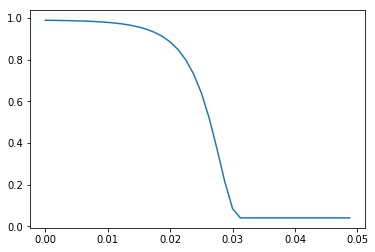

In [42]:
escala=[i/N for i in range(N_part)]
fig, ax = plt.subplots()
ax.plot(escala, s(I1_rms_C))  
plt.show()

In [43]:


# ensayo cuasi corto-circuito usando valores de arranque , OJO QUE ESTOY USANDO VALORES RMS
R1_A= 0.96*( Power_A[0]/(I1_list_A[0]*np.conjugate(I1_list_A[0])))/2    # el coeficiente 0.95 adelante es para tunear
R2prima_A=R1_A*0.999

X1_A=X2prima_A= 1.09*(Power_REAC_A[0]/(I1_list_A[0]*np.conjugate(I1_list_A[0])))/2  # el coeficiente 1.08 adelante es para tunear

# cuasi ensayo en vacío, en realidad simplemente resuelvo el circuito para encontrar Z0
s_nom   #valor de chapa, cargar al principio, se mantiene durante operacion normal   
In           # valor de chapa, cargar al principio
Z2prima_A= R2prima_A/s(I1_rms_A[-1]) + 1j*X2prima_A  # asigno semillas para cálculo refinado

# asigno semillas para cálculo refinado
Z1_seed_A=R1_A + 1j*X1_A


def F(Z0_nom_A):   # calculo uno Z0 nominal, suponiendo que estoy en condiciones normales de operación luego del arranque    
    return Zeq_partida_A[-1]-( Z1_seed_A +  Z0_nom_A*Z2prima_A/(Z0_nom_A+ Z2prima_A) )  # uso el último Zeq de la serie => operación normal
Z0_nom_A =  scipy.optimize.broyden1(F, (10+10j),f_tol=1e-10)





# asigno parámetros calculados
Z0_A=Z0_nom_A   

Z1_A=Z1_seed_A


In [44]:
Z1_A , Z0_A , Z2prima_A

((6.314156906903175+11.781081660327725j),
 array(34.01138715+8.2942161j),
 (157.69606874921212+11.781081660327725j))

In [45]:
# FASE B  
R1_B= 0.96*( Power_B[0]/(I1_list_B[0]*np.conjugate(I1_list_B[0])))/2    # el coeficiente 0.95 adelante es para tunear
R2prima_B=R1_B*0.999

X1_B=X2prima_B= 1.09*(Power_REAC_B[0]/(I1_list_B[0]*np.conjugate(I1_list_B[0])))/2  # el coeficiente 1.08 adelante es para tunear

# cuasi ensayo en vacío, en realidad simplemente resuelvo el circuito para encontrar Z0
s_nom   #valor de chapa, cargar al principio, se mantiene durante operacion normal   
In           # valor de chapa, cargar al principio
Z2prima_B= R2prima_B/s(I1_rms_B[-1]) + 1j*X2prima_B  # asigno semillas para cálculo refinado

# asigno semillas para cálculo refinado
Z1_seed_B= R1_B + 1j*X1_B

def F(Z0_nom_B):   # calculo uno Z0 nominal, suponiendo que estoy en condiciones normales de operación luego del arranque    
    return Zeq_partida_B[-1]-( Z1_seed_B +  Z0_nom_B*Z2prima_B/(Z0_nom_B+ Z2prima_B) )  # uso el último Zeq de la serie => operación normal
Z0_nom_B =  scipy.optimize.broyden1(F, (10+10j),f_tol=1e-10)



# asigno parámetros calculados
Z0_B=Z0_nom_B   

Z1_B=Z1_seed_B



In [46]:
Z1_B , Z0_B , Z2prima_B , R1_B  # esto no está mal pero puede mejorar, sobre todo las partes complejas

((6.3365759059827935+11.78755875705413j),
 array(34.01197611+8.23293474j),
 (157.20761309563133+11.78755875705413j),
 (6.3365759059827935+0j))

In [47]:
# FASE C
# ACA CALCULO Y REFINO LOS PARAMETROS HACIENDO UNA SEGUNDA ITERACION
# la parte compleja de Z0 era demasiado grande y eso me desplaza la parte compleja en Z2prima_partida

# ensayo cuasi corto-circuito usando valores de arranque , OJO QUE ESTOY USANDO VALORES RMS
R1_C= 0.96*( Power_C[0]/(I1_list_C[0]*np.conjugate(I1_list_C[0])))/2    # el coeficiente 0.95 adelante es para tunear
R2prima_C=R1_C*0.999

X1_C=X2prima_C= 1.09*(Power_REAC_C[0]/(I1_list_C[0]*np.conjugate(I1_list_C[0])))/2  # el coeficiente 1.08 adelante es para tunear

# cuasi ensayo en vacío, en realidad simplemente resuelvo el circuito para encontrar Z0
s_nom   #valor de chapa, cargar al principio, se mantiene durante operacion normal   
In           # valor de chapa, cargar al principio
Z2prima_C= R2prima_C/s(I1_rms_C[-1]) + 1j*X2prima_C  # asigno semillas para cálculo refinado

# asigno semillas para cálculo refinado
Z1_seed_C=R1_C + 1j*X1_C

def F(Z0_nom_C):   # calculo uno Z0 nominal, suponiendo que estoy en condiciones normales de operación luego del arranque    
    return Zeq_partida_C[-1]-( Z1_seed_C +  Z0_nom_C*Z2prima_C/(Z0_nom_C+ Z2prima_C) )  # uso el último Zeq de la serie => operación normal
Z0_nom_C =  scipy.optimize.broyden1(F, (10+10j),f_tol=1e-10)



# asigno parámetros calculados
Z0_C=Z0_nom_C   

Z1_C=Z1_seed_C


In [48]:
Z1_C , Z0_C , Z2prima_C   #OK

((6.320413428305199+11.80639082829052j),
 array(34.07141148+8.23942607j),
 (157.43881196530504+11.80639082829052j))

In [58]:
# Corrijo Manualmente estos parámetros para arrimarlos mejor

R1_A = R1_A*0.97 
X1_A = X1_A*1.08 
R2prima_A = R1_A
X2prima_A = X1_A

R1_B = R1_B*0.97 
X1_B = X1_B*1.08 
R2prima_B = R1_B
X2prima_B = X1_B

R1_C = R1_C*0.97 
X1_C = X1_C*1.08
R2prima_C = R1_C
X2prima_C = X1_C


Z1_A =   R1_A + 1j*X1_A                         #  *0.97     *1.08
Z0_A =  np.real(Z0_A)*1.005 + 1j*np.imag(Z0_A)*0.95

Z1_B = R1_B + 1j*X1_B                           #  *0.97
Z0_B =  np.real(Z0_B)*1.005 + 1j*np.imag(Z0_B)*0.95
 
Z1_C = R1_C+ 1j*X1_C                     #  *0.97
Z0_C =  np.real(Z0_C)*1.005 + 1j*np.imag(Z0_C)*0.95

In [59]:
Z1_A , Z0_A , Z1_B , Z0_B ,Z1_C  ,Z0_C

((6.12473219969608+12.723568193153945j),
 (34.524113059243035+7.4855300280100465j),
 (6.14647862880331+12.730563457618462j),
 (34.52471090632571+7.430223601155953j),
 (6.1308010254560426+12.750902094553762j),
 (34.585042265303144+7.436082031476048j))

In [473]:
#Z2prima_partida_A = Z0_A*(Z1_A-Zeq_partida_A)/(Zeq_partida_A-Z1_A-Z0_A)  # Luego del refinamiento se corrige drásticamente el problema
                                                           # Sigue decreciendo la parte compleja, pero mucho menos
#Z2prima_partida_B = Z0_B*(Z1_B-Zeq_partida_B)/(Zeq_partida_B-Z1_B-Z0_B)
#Z2prima_partida_C = Z0_C*(Z1_C-Zeq_partida_C)/(Zeq_partida_C-Z1_C-Z0_C)

In [53]:
# Uso directamente el resbalamiento y calculo las Z2 a partir de R1
# cuando tenga R1 medida, tengo que cambiar esto y poner R2
Z2prima_partida_A =   R1_A*0.97/s_A + 1j*X1_A*1.08  
Z2prima_partida_B =   R1_B*0.97/s_B + 1j*X1_B*1.08  
Z2prima_partida_C =   R1_B*0.97/s_B + 1j*X1_B*1.08  

In [54]:
Z2prima_partida_A,  Z2prima_partida_B,  Z2prima_partida_C  

(array([  6.13114549+12.72356819j,   6.13086306+12.72356819j,
          6.131404  +12.72356819j,   6.13291114+12.72356819j,
          6.13562163+12.72356819j,   6.13988729+12.72356819j,
          6.14620591+12.72356819j,   6.15526772+12.72356819j,
          6.16802399+12.72356819j,   6.18578893+12.72356819j,
          6.21039306+12.72356819j,   6.24441863+12.72356819j,
          6.29156978+12.72356819j,   6.35727175+12.72356819j,
          6.44967451+12.72356819j,   6.58140389+12.72356819j,
          6.77276761+12.72356819j,   7.0579772 +12.72356819j,
          7.49810912+12.72356819j,   8.21057969+12.72356819j,
          9.44399365+12.72356819j,  11.79706219+12.72356819j,
         16.98812654+12.72356819j,  31.29506678+12.72356819j,
         86.36292232+12.72356819j, 153.02916066+12.72356819j,
        153.03619752+12.72356819j, 153.04313804+12.72356819j,
        153.0499805 +12.72356819j, 153.05672318+12.72356819j,
        153.06336441+12.72356819j, 153.06990253+12.72356819j,
        

In [71]:
# Evalúo el error en Z0 luego de forzar Z2, en este caso en la fase C

Z_0_prima_partida_C = ((Zeq_partida_C - Z1_C )*Z2prima_partida_C)/(Z2prima_partida_C-Zeq_partida_C+Z1_C)
Z_0_prima_partida_C  # Da muy mal en el medio y bien en los extremos, no lo puedo usar en general

array([39.96477665 +9.26471019j, 39.93547398 +9.11484845j,
       39.861259   +8.82709267j, 39.73870119 +8.40192088j,
       39.56281278 +7.84028598j, 39.32712742 +7.14375375j,
       39.0238295  +6.31467501j, 38.64395288 +5.35637815j,
       38.17767227 +4.27335952j, 37.61471581 +3.07143699j,
       36.9449333  +1.75781448j, 36.15906283 +0.34097982j,
       35.24975519 -1.16968029j, 34.21295193 -2.76472669j,
       33.04980135 -4.43626521j, 31.76951448 -6.18080436j,
       30.39412544 -8.00435437j, 28.96766949 -9.93184281j,
       27.57702125-12.02558981j, 26.4082873 -14.42404577j,
       25.93327236-17.42245065j, 27.6894094 -21.52825388j,
       37.7108234 -24.85910951j, 49.65281489 -3.90160749j,
       35.53033362 +6.21524853j, 34.67604974 +6.86780848j,
       34.67615494 +6.86728835j, 34.67624483 +6.86676352j,
       34.67631938 +6.86623411j, 34.67637857 +6.86570025j,
       34.67642239 +6.86516208j, 34.67645084 +6.86461973j,
       34.6764639  +6.86407334j, 34.67646157 +6.86352305

In [76]:
# Evalúo el error absoluto, la ecuación debería dar cero exacto

Err_A = Zeq_partida_A-( Z1_A +  Z0_A*Z2prima_partida_A/(Z0_A+ Z2prima_partida_A))
Err_B = Zeq_partida_B-( Z1_B +  Z0_B*Z2prima_partida_B/(Z0_B+ Z2prima_partida_B))
Err_C = Zeq_partida_C-( Z1_C +  Z0_C*Z2prima_partida_C/(Z0_C+ Z2prima_partida_C))


max(abs(Err_A)), max(abs(Err_B)), max(abs(Err_C)), np.average(abs(Err_A)), np.average(abs(Err_B)), np.average(abs(Err_C))


(3.655597186056791,
 4.041465965922594,
 4.400127717261899,
 0.9606251560666184,
 1.03648124289241,
 1.0816486616247691)

In [77]:


s_list=  ( s_A+ s_B+ s_C)/3   # promedio de las 3 fases, ya que deben girar a la misma velocidad

Vel_angular_list= Vel_angular_nom*(1-s_list) 

s_list , Vel_angular_list



(array([0.99472426, 0.99461605, 0.99438438, 0.99400484, 0.99343838,
        0.99262827, 0.99149558, 0.98993259, 0.98779344, 0.9848807 ,
        0.98092632, 0.9755641 , 0.96828988, 0.95840357, 0.94492441,
        0.92646755, 0.90106721, 0.86593438, 0.81716101, 0.74947631,
        0.65644908, 0.53227678, 0.37764563, 0.21177183, 0.07950092,
        0.04012394, 0.04012394, 0.04012394, 0.04012394, 0.04012394,
        0.04012394, 0.04012394, 0.04012394, 0.04012394, 0.04012394,
        0.04012394, 0.04012394, 0.04012394, 0.04012394, 0.04012394]),
 array([  1.76791704,   1.80417864,   1.8818114 ,   2.00899578,
          2.198819  ,   2.47028951,   2.84985819,   3.37361988,
          4.09045798,   5.06652535,   6.39165014,   8.18854816,
         10.6261625 ,  13.93909584,  18.4560059 ,  24.64096112,
         33.1526962 ,  44.92582124,  61.26993338,  83.95129596,
        115.12501904, 156.73555639, 208.55295028, 264.13779401,
        308.46220238, 321.65755636, 321.65755636, 321.65755636,
      

In [81]:
# Calculo la resistencia mecánica equivalente
Rmec_A=[ (R2prima_A/0.999)*(1-s_list)/s_list]  # resistencia mecánica equivalente reducida al primario, el 0.999 es por s inicial
Rmec_B=[ (R2prima_B/0.999)*(1-s_list)/s_list]
Rmec_C=[ (R2prima_C/0.999)*(1-s_list)/s_list]

In [82]:
# Cálculo las corrientes
I0_list_A = (U1_list_A  -I1_list_A*Z1_A)/Z0_A
I2prima_list_A = (U1_list_A  -I1_list_A*Z1_A)/Z2prima_partida_A

I0_list_B = (U1_list_B  -I1_list_B*Z1_B)/Z0_B
I2prima_list_B = (U1_list_B  -I1_list_B*Z1_B)/Z2prima_partida_B

I0_list_C = (U1_list_C  -I1_list_C*Z1_C)/Z0_C
I2prima_list_C = (U1_list_C  -I1_list_C*Z1_C)/Z2prima_partida_C


In [83]:
I2prima_list_A , I2prima_list_B , I2prima_list_C  # en la fase B da mayor en el arranque

(array([1.58302846-4.67023054j, 1.58085706-4.6715082j ,
        1.57655007-4.67412115j, 1.57008191-4.67809983j,
        1.56141711-4.68349082j, 1.55051305-4.69035784j,
        1.53732468-4.69878289j, 1.52181229-4.70886757j,
        1.50395405-4.72073414j, 1.48376671-4.7345256j ,
        1.46133941-4.75040344j, 1.43688969-4.7685399j ,
        1.41085733-4.78909838j, 1.3840639 -4.81218812j,
        1.35798879-4.83776227j, 1.33525583-4.86538869j,
        1.32050662-4.89372335j, 1.32198431-4.91925823j,
        1.35436682-4.93320936j, 1.44336957-4.91341589j,
        1.6300705 -4.80269216j, 1.95461403-4.45508102j,
        2.32034405-3.56498728j, 2.16059485-1.96625993j,
        1.12404113-0.56982113j, 0.69662438-0.28097102j,
        0.69659627-0.28095306j, 0.69656874-0.2809354j ,
        0.6965418 -0.28091803j, 0.69651544-0.28090095j,
        0.69648967-0.28088418j, 0.69646451-0.28086771j,
        0.69643996-0.28085156j, 0.69641602-0.28083572j,
        0.6963927 -0.28082019j, 0.69637   -0.280

In [84]:
Cos_fi_resumen= (np.cos(np.angle(Zeq_partida_A)) + np.cos(np.angle(Zeq_partida_B)) + np.cos(np.angle(Zeq_partida_C)))/3
                 
Power_mec= np.real(Rmec_A*I2prima_list_A*np.conjugate(I2prima_list_A)   
                      +Rmec_B*I2prima_list_B*np.conjugate(I2prima_list_B) 
                       + Rmec_C*I2prima_list_C*np.conjugate(I2prima_list_C) ) # le saco la parte compleja error numérico orden e-17

Torque=Power_mec/Vel_angular_list
RPM_list= Vel_angular_list*60/(2*np.pi)
efficiency=Power_mec/(Power_A + Power_B +Power_C )  # Da muy baja, puede ser en parte porque es un motor "inventado"

In [85]:
efficiency*100

array([[ 0.15925641,  0.16247379,  0.16935119,  0.18061264,  0.19741426,
         0.22143231,  0.25499701,  0.30128962,  0.3646311 ,  0.45090756,
         0.56820609,  0.72778383,  0.94558071,  1.24464739,  1.65916602,
         2.24134001,  3.07362895,  4.29121744,  6.12418766,  8.97513409,
        13.53772541, 20.78815269, 30.56889617, 35.32353847, 22.94411643,
        14.98790675, 14.98722445, 14.98652975, 14.98582282, 14.98510384,
        14.98437299, 14.98363045, 14.9828764 , 14.98211103, 14.98133452,
        14.98054708, 14.97974889, 14.97894015, 14.97812107, 14.97729185]])

In [86]:
Torque

array([[1.34270364, 1.34324945, 1.34428767, 1.34586997, 1.34807794,
        1.35102924, 1.35488672, 1.35987181, 1.36628404, 1.37452934,
        1.38516188, 1.39894652, 1.41695394, 1.44070857, 1.47242359,
        1.51538262, 1.57457064, 1.65772158, 1.7769941 , 1.95117724,
        2.20568965, 2.55243909, 2.86878949, 2.59426032, 1.33960393,
        0.77664251, 0.77660716, 0.77657116, 0.77653453, 0.77649727,
        0.7764594 , 0.77642093, 0.77638185, 0.77634219, 0.77630196,
        0.77626115, 0.77621979, 0.77617788, 0.77613544, 0.77609247]])

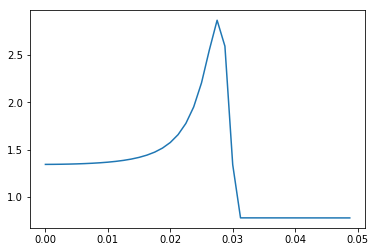

In [87]:
escala=[i/N for i in range(N_part)]
fig, ax = plt.subplots()
ax.plot(escala, Torque[0])  #  ojo con el shape de Torque[0] que es [1,40]  !!
plt.show() 

In [88]:
abs(If1_partida_peaks_coef_B/ I1_list_B)

array([1.41421062, 1.41421061, 1.41421061, 1.4142106 , 1.4142106 ,
       1.41421059, 1.41421058, 1.41421058, 1.41421057, 1.41421056,
       1.41421056, 1.41421055, 1.41421054, 1.41421054, 1.41421053,
       1.41421052, 1.41421052, 1.41421051, 1.4142105 , 1.41421049,
       1.41421049, 1.41421048, 1.41421047, 1.41421046, 1.41421045,
       1.41421045, 1.41421044, 1.41421043, 1.41421042, 1.41421042,
       1.41421041, 1.4142104 , 1.41421039, 1.41421038, 1.41421037,
       1.41421037, 1.41421036, 1.41421035, 1.41421034, 1.41421033])